# <center>Predicting The Temperature Parameters of Blast Furnace Using Machine Learning & Deep Learning</center>
---
# <center>REGRESSION ANALYSIS USING DEEP NEURAL NETWORK</center>
---
## <div style="text-align: center"><u>Done by :-</u> K SAI DINESH (100019974)</div>
---


## Import necessary libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

## Read in the modified dataset

In [17]:
df = pd.read_csv('modified_bf_data.csv', index_col=[0])
df.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,SAT_1,SAT_2,SAT_3,SAT_4
0,2021-07-01 00:10:00,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,121.0,2.0,22.22,21.00,3.88,69.940478,73.583364,77.713731,82.332439,85.074844
1,2021-07-01 00:20:00,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,125.0,1.0,22.56,21.00,3.94,71.454476,74.666066,77.198904,82.604995,84.877672
2,2021-07-01 00:30:00,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,124.0,1.0,22.49,21.08,3.94,70.579462,74.837214,78.518159,84.475989,83.397999
3,2021-07-01 00:40:00,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,115.0,1.0,22.36,21.13,3.99,70.179791,75.008361,80.865417,84.880888,83.368013
4,2021-07-01 00:50:00,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,125.0,1.0,22.25,21.30,4.10,70.728470,75.799102,82.564532,84.282448,84.592822


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26471 entries, 0 to 26470
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_TIME      26471 non-null  object 
 1   CB_FLOW        26471 non-null  float64
 2   CB_PRESS       26471 non-null  float64
 3   CB_TEMP        26471 non-null  float64
 4   STEAM_FLOW     26471 non-null  float64
 5   STEAM_TEMP     26471 non-null  float64
 6   STEAM_PRESS    26471 non-null  float64
 7   O2_PRESS       26471 non-null  float64
 8   O2_FLOW        26471 non-null  float64
 9   O2_PER         26471 non-null  float64
 10  PCI            26471 non-null  float64
 11  ATM_HUMID      26471 non-null  float64
 12  HB_TEMP        26471 non-null  float64
 13  HB_PRESS       26471 non-null  float64
 14  TOP_PRESS      26471 non-null  float64
 15  TOP_TEMP1      26471 non-null  float64
 16  TOP_TEMP2      26471 non-null  float64
 17  TOP_TEMP3      26471 non-null  float64
 18  TOP_TE

## Do the train test split

In [19]:
X = df.drop(['SAT_1','SAT_2','SAT_3','SAT_4'],axis=1)
X.drop('DATE_TIME',axis=1,inplace=True)
y = df[['SAT_1','SAT_2','SAT_3','SAT_4']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
column_list = pd.DataFrame(X.columns.to_list(), columns=['Params'])
column_list.to_csv('columns.csv', index = False)

## Scale the data

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Initialize the required Deep Neural Network

In [23]:
# build the model
model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(75, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(4, activation='linear')) # output node
model.summary() # see what your model looks like

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               2600      
                                                                 
 dense_7 (Dense)             (None, 75)                7575      
                                                                 
 dense_8 (Dense)             (None, 50)                3800      
                                                                 
 dense_9 (Dense)             (None, 25)                1275      
                                                                 
 dense_10 (Dense)            (None, 4)                 104       
                                                                 
Total params: 15,354
Trainable params: 15,354
Non-trainable params: 0
_________________________________________________________________


In [24]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#### A parameter to monitor the training process and reduce any redundant epochs.

In [25]:
# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

## Fit the training data

In [26]:
# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=100,
                    verbose=1)

Epoch 1/5000


186/186 [==============================] - 1s 3ms/step - loss: 1557.5145 - mae: 27.5408 - val_loss: 220.6767 - val_mae: 10.5447
Epoch 2/5000
186/186 [==============================] - 0s 3ms/step - loss: 190.9428 - mae: 9.5246 - val_loss: 165.0625 - val_mae: 8.8098
Epoch 3/5000
186/186 [==============================] - 1s 3ms/step - loss: 159.1024 - mae: 8.5144 - val_loss: 149.0071 - val_mae: 8.2100
Epoch 4/5000
186/186 [==============================] - 0s 3ms/step - loss: 144.9206 - mae: 8.0013 - val_loss: 136.2186 - val_mae: 7.8090
Epoch 5/5000
186/186 [==============================] - 1s 3ms/step - loss: 134.2327 - mae: 7.6541 - val_loss: 128.4596 - val_mae: 7.5303
Epoch 6/5000
186/186 [==============================] - 1s 3ms/step - loss: 128.8667 - mae: 7.4622 - val_loss: 124.2750 - val_mae: 7.4313
Epoch 7/5000
186/186 [==============================] - 0s 3ms/step - loss: 124.2144 - mae: 7.3230 - val_loss: 122.8286 - val_mae: 7.3578
Epoch 8/5000
186/186 [======================

## Predict the test data and check for its performance

In [27]:
trainpreds = model.predict(X_train)
pred = model.predict(X_test)

249/249 [==============================] - 1s 2ms/step


In [28]:
print(f"The accuracy of the ANN model is : {round(r2_score(y_test,pred)*100,2)}%")

The accuracy of the ANN model is : 93.89%


## Visualizing loss values across epochs

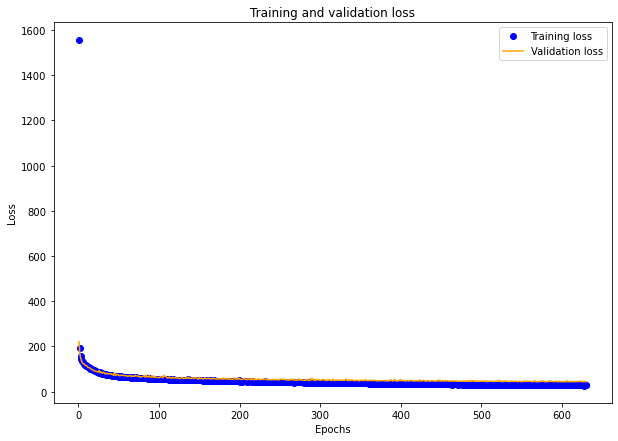

In [29]:
plt.figure(figsize=(10,7))
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Visualization of variance among the actual and predicted values

249/249 [==============================] - 1s 2ms/step


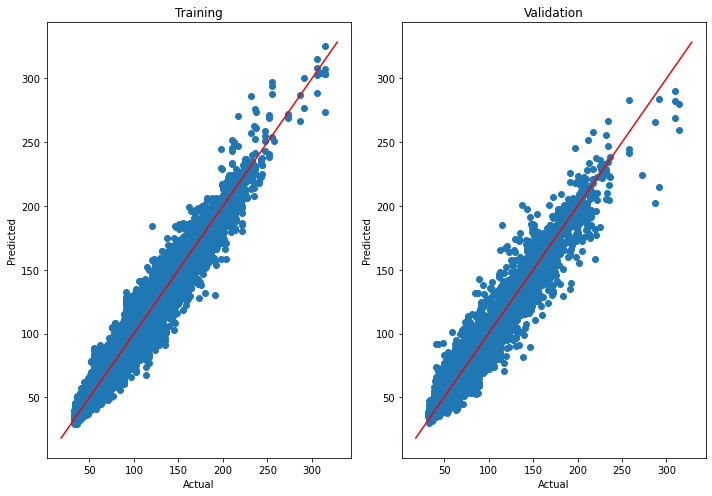

In [30]:
fig, axes = plt.subplots(1,2, figsize=(10,7)) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

## Fit the entire dataset for the final model

In [31]:
X = scaler.fit_transform(X)
model.fit(X, y, epochs=1000, batch_size=100, verbose=1)

Epoch 1/1000
265/265 [==============================] - 1s 2ms/step - loss: 35.8370 - mae: 4.1372
Epoch 2/1000
265/265 [==============================] - 1s 2ms/step - loss: 34.2129 - mae: 4.0684
Epoch 3/1000
265/265 [==============================] - 1s 2ms/step - loss: 35.0075 - mae: 4.1075
Epoch 4/1000
265/265 [==============================] - 1s 2ms/step - loss: 34.1280 - mae: 4.0631
Epoch 5/1000
265/265 [==============================] - 1s 2ms/step - loss: 33.3328 - mae: 4.0271
Epoch 6/1000
265/265 [==============================] - 1s 2ms/step - loss: 33.0654 - mae: 4.0228
Epoch 7/1000
265/265 [==============================] - 1s 2ms/step - loss: 33.1471 - mae: 4.0193
Epoch 8/1000
265/265 [==============================] - 1s 2ms/step - loss: 32.5665 - mae: 3.9771
Epoch 9/1000
265/265 [==============================] - 1s 2ms/step - loss: 32.6006 - mae: 3.9894
Epoch 10/1000
265/265 [==============================] - 0s 2ms/step - loss: 32.3692 - mae: 3.9826
Epoch 11/1000
265/2

### Save the model as pickle file for deployment purposes in the future

In [32]:
import joblib
joblib.dump(model, 'dnn_model.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-06-23 14:26:54         2658
metadata.json                                  2023-06-23 14:26:54           64
variables.h5              

['dnn_model.pkl']

#### Some random testing, not part of the above training or testing process

In [53]:
cols = X.columns.to_list()

In [86]:
row = np.array([311727,3.15,129,4,213,3.34,3.2,7296,23.08,32,24.56,1060,2.99,1.5,112,135,107,130,0,121,2,22.22,21,3.88,69.940478])
row = scaler.transform([row])
X = pd.DataFrame(row, columns = cols)
prediction = model.predict(X)
prediction

1/1 [==============================] - 0s 43ms/step


c:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[72.00261, 75.05197, 76.86204, 78.14084]], dtype=float32)

# <center> --- End of Notebook --- </center>